# Assignment01 _ 20141697 Kim Hyojun

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy.linalg as lin

## Problem 1

In [2]:
q1 = pd.DataFrame(columns=['y1', 'y2', 'y3'])
y1 = [35.0,35.0,40.0,10.0,6.0,20.0,35.0,35.0,35.0,30.0]
y2 = [3.50,4.90,30.0,2.80,2.70, 2.80,4.60,10.90,8.00,1.60]
y3 = [2.80,2.70,4.380,3.210,2.730,2.810,2.880,2.90,3.280,3.20]

q1['y1'] = y1
q1['y2'] = y2
q1['y3'] = y3

#q1

###### A. Visualize the data and describe any potential relationships between the variables that you can observe visually.

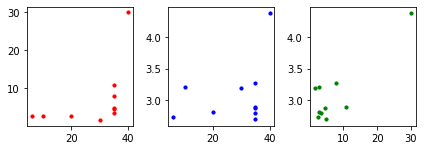

In [3]:
# y1: Available Soil Calcium
# y2: Exchangeable Soil Calcium
# y3: Turnip Green Calcium

# sns.pairplot(q1, diag_kind='hist')

plt.subplot(2,3,1) 
plt.scatter(q1['y1'], q1['y2'], c='red', s=10)

plt.subplot(2,3,2) 
plt.scatter(q1['y1'], q1['y3'], c='blue', s=10)

plt.subplot(2,3,3) 
plt.scatter(q1['y2'], q1['y3'], c='green', s=10)

plt.tight_layout()

plt.show()

# In case between y1 and y2(red color) and between y1 and y3 (blue color), those case seem to have a waekly correlation.
# because, their points scattered flatly according to x-axis and distributed largely.
# However, in case between y2 and y3 (green color), it seems to have a somewhat stron correlation. 
# because, their points distributed narrowly and scattered more near the y-axis

###### B. Calculate the sample mean vector.

In [4]:
y1bar = "%0.3f" % q1['y1'].mean()
y2bar = "%0.3f" % q1['y2'].mean()
y3bar = "%0.3f" % q1['y3'].mean()

meanv_y1 = float(y1bar) 
meanv_y2 = float(y2bar) 
meanv_y3 = float(y3bar) 

list_mv = [meanv_y1, meanv_y2, meanv_y3]
sample_mean_vector = np.array(list_mv)
sample_mean_vector

array([28.1  ,  7.18 ,  3.089])

###### C. Calculate the sample covariance matrix

In [5]:
q1_centered = pd.DataFrame(columns=['y1_centered', 'y2_centered', 'y3_centered'])
q1_centered['y1_centered'] = q1['y1'] - 28.1
q1_centered['y2_centered'] = q1['y2'] - 7.18
q1_centered['y3_centered'] = q1['y3'] - 3.089

d = q1_centered.values
dt = np.transpose(d)

cov_matrix = np.dot(dt,d)
cov = pd.DataFrame(data=cov_matrix) * 1/9
cov

,0,1,2
0,140.544444,49.680000,1.941222
1,49.680000,72.248444,3.676089
2,1.941222,3.676089,0.250121


###### D. Calculate the sample correlation matrix

In [6]:
q1.corr()

,y1,y2,y3
y1,1.000000,0.493015,0.327411
y2,0.493015,1.000000,0.864762
y3,0.327411,0.864762,1.000000


## Problem 2

In [7]:
data1a = pd.read_csv("C:/Users/johnny0614/OneDrive - unist.ac.kr/UNIST/19년 2학기/multivariate/hw1_data/hw1_data1a.txt", sep="  ", header=None, names=["y1", "y2"])
data1b = pd.read_csv("C:/Users/johnny0614/OneDrive - unist.ac.kr/UNIST/19년 2학기/multivariate/hw1_data/hw1_data1b.txt", sep="  ", header=None, names=["y1", "y2"])

C:\Users\johnny0614\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Users\johnny0614\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [8]:
#print(data1a.shape)
#data1b.shape

In [9]:
#data1a.head()

In [10]:
#data1b.head()

###### A. Draw a 2D plot of the data samples in the dataset of “hw1_data1a” (in blue). Then, on top of that, draw another 2D plot of the data samples in “hw1_data1b” (in red). (So, there should be a total of 2,000 points with two different colors in your 2D graph). Describe how differently the two datasets are distributed.

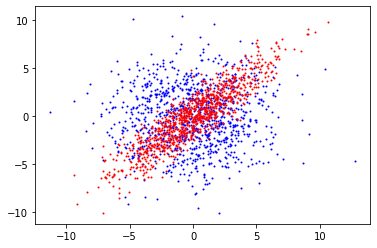

In [11]:
plt.scatter(data1a['y1'], data1a['y2'], c='blue', s=1)
plt.scatter(data1b['y1'], data1b['y2'], c='red', s=1)
plt.show()

# As we can see the below graph, data in blue graph are much largely distribued. So, scatterness looks so greater than red one.
# In contrast, data in red graph are not much largely distributed than blue one, it is distributed almost linearly. 
# So, It is more centered than blue one.
# It this, the scatterness of red one is smaller than blue one. 

###### B. Compare the overall variability between the two datasets using the trace of sample covariance matrix.

In [12]:
data1a_cov = data1a.cov()
data1b_cov = data1b.cov()
print("Tr(data1a): ",np.trace(data1a_cov))
print("Tr(data1b): ",np.trace(data1b_cov))

Tr(data1a):  19.85781581366452
Tr(data1b):  18.975145055357075


###### C. Compare the overall variability between the two datasets using the determinant of sample covariance matrix.

In [13]:
print("det(data1a): ", np.linalg.det(data1a_cov))
print("det(data1b): ", np.linalg.det(data1b_cov))

det(data1a):  98.58157293789854
det(data1b):  17.065648368511397


###### D. Discuss what the results in B and C indicate.

In [14]:
# In sample COV matrix, value of trace is S11 + S22 + .... + Spp. So, It is called total sample variance. 
# In terms of variance, it considered just distance of the data from the mean. 
# So, In that reason, the results of two traces are not that much different in terms of total sample variance. 
# However, In terms of determinant of sample cov matrix, it considered Covaring properties of data.
# As we see the above grpah, red one is more centered and linearly distributed. 
# in thast sense, determinant of sample cov matrix of red one is smaller than blue one. 

###### E. In the new figure, draw again a 2D plot of the data samples in “hw1_data1b” (in black). Then, on top of that, draw the following vectors as points. 

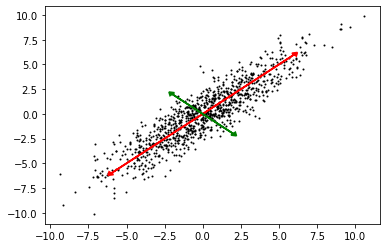

In [15]:
# y1 = [6, 6]T (draw in red)
# y2 = [-6, -6]T (draw in red)
# x3 = [2, -2]T (draw in green)
# x4 = [-2, 2]T (draw in green)

ar = plt.axes()
y1 = ar.arrow(0, 0, 6, 6, head_width=0.4, head_length=0.3, lw=1.7, color='red')
y2 = ar.arrow(0, 0, -6, -6, head_width=0.4, head_length=0.3, lw=1.7, color='red')
x3 = ar.arrow(0, 0, 2, -2, head_width=0.4, head_length=0.3, lw=1.7, color='green')
x4 = ar.arrow(0, 0, -2, 2, head_width=0.4, head_length=0.3, lw=1.7, color='green')

plt.scatter(data1b['y1'], data1b['y2'], c='black', s=1)

plt.show()

###### F. Calculate the Euclidean distance between (y1 and y2), and between (x1 and x2) and compare them.

In [16]:
from scipy.spatial import distance
y1 = (6,6)
y2 = (-6,-6)
dst_y1y2 = distance.euclidean(y1, y2)

x3 = (2,-2)
x4 = (-2,2)
dst_x3x4 = distance.euclidean(x3,x4)

print("Euclidean distance between y1 and y2 : ", dst_y1y2)
print("Euclidean distance between x3 and x4 : ", dst_x3x4)

Euclidean distance between y1 and y2 :  16.97056274847714
Euclidean distance between x3 and x4 :  5.656854249492381


###### G. Calculate the Mahalanobis distance between (y1 and y2), and between (x1 and x2) and compare them.

In [17]:
import scipy.spatial.distance 
y1 = np.array([6,6])
y2 = np.array([-6,-6])

VI = lin.inv(data1b_cov)
Mahal_y1_y2 = scipy.spatial.distance.mahalanobis(y1, y2, VI)

x3 = np.array([2,-2])
x4 = np.array([-2,2])

cov_x34 = np.array([[0,1],[1,0]])
IV = lin.inv(data1b_cov)

Mahal_x3_x4 = scipy.spatial.distance.mahalanobis(x3, x4,IV)

print("Mahalanobis distance between y1 and y2: ", "%0.3f" % Mahal_y1_y2)
print("Mahalanobis distance between x3 and x4: ", "%0.3f" % Mahal_x3_x4)

Mahalanobis distance between y1 and y2:  3.998
Mahalanobis distance between x3 and x4:  5.814


###### H. Discuss how come these two distance results are different.

In [18]:
# Euclidean distance is distance between two points. In this, it is like physical distance. 
# In this, as we can see the aboce graph, the red one has larger distance than green one.
# So the results Euclidean distance of red one is greater than green one, as red one 16.97 > green one 5.65 
# Pysical difference between two distances is 11.32
# However, In terms of Mahalanobis distance, the results of the distances is totally different with previous case. 
# In this case, red one is smaller than green one, as red 3.998 < green 5.814
# Because, Mahalanobis distance considers covring properties of the data sample. 
# In that sense, the distance could be different based on correlations of the data in Mahalnobis distance with the Euclidean distance

## Problem 3

In [19]:
data2 = pd.read_csv("C:/Users/johnny0614/OneDrive - unist.ac.kr/UNIST/19년 2학기/multivariate/hw1_data/hw1_data2.txt", sep="  ", header=None, names=["y1", "y2", "y3"])

C:\Users\johnny0614\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [20]:
#data2.shape

In [21]:
# data2

###### A. Draw a 2D scatter plot for each pair of variables in the vector. Find whether individual variables are correlated with each other.

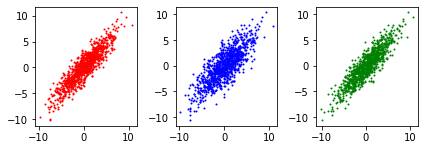

In [22]:
plt.subplot(2,3,1) 
plt.scatter(data2['y1'], data2['y2'], c='red', s=1)

plt.subplot(2,3,2) 
plt.scatter(data2['y1'], data2['y3'], c='blue', s=1)

plt.subplot(2,3,3) 
plt.scatter(data2['y2'], data2['y3'], c='green', s=1)

plt.tight_layout()

plt.show()

# as we can see the below figures, Y1, Y2 and Y3 are correlative each other 

###### B. Now, partition the current 3D vector into two parts, [y x]T, such that y is a partitioned 2D vector and x is a partitioned 1D variable. For each value of x, calculate the mean vector of the conditional distribution of y given x, f(y|x). Plot the resulting conditional mean vectors as points in a 2D graph and describe what you observe.

In [59]:
y1x = data2[['y1', 'y3']]
y2x = data2[['y2','y3']]

mean_y1 = float("%0.3f" % data2['y1'].mean())
mean_x = float("%0.3f" % data2['y3'].mean())
mean_y2 = float("%0.3f" % data2['y2'].mean()) 

cov_y1x = y1x.cov
cov_y2x = y2x.cov

## Problem 4

In [24]:
data3a = pd.read_csv("C:/Users/johnny0614/OneDrive - unist.ac.kr/UNIST/19년 2학기/multivariate/hw1_data/hw1_data3a.txt", header=None, names=["y1"])
data3b = pd.read_csv("C:/Users/johnny0614/OneDrive - unist.ac.kr/UNIST/19년 2학기/multivariate/hw1_data/hw1_data3b.txt", header=None, names=["y2"])
data3c = pd.read_csv("C:/Users/johnny0614/OneDrive - unist.ac.kr/UNIST/19년 2학기/multivariate/hw1_data/hw1_data3c.txt", header=None, names=["y3"])

In [25]:
#print(data3a.shape)
#print(data3b.shape)
#print(data3c.shape)

In [26]:
aaa = data3a['y1']
bbb = data3b['y2']
ccc = data3c['y3']

##### Download the file, hw1_data3a.txt, hw1_data3b.txt, and hw1_data3c.txt from the class website. Draw the Q-Q plot for each dataset. Compare the results and discuss the variance of each data relative to the normal distribution.

(-3.5173484449224093, 3.5173484449224093, -4.88502684, 6.100434239999999)

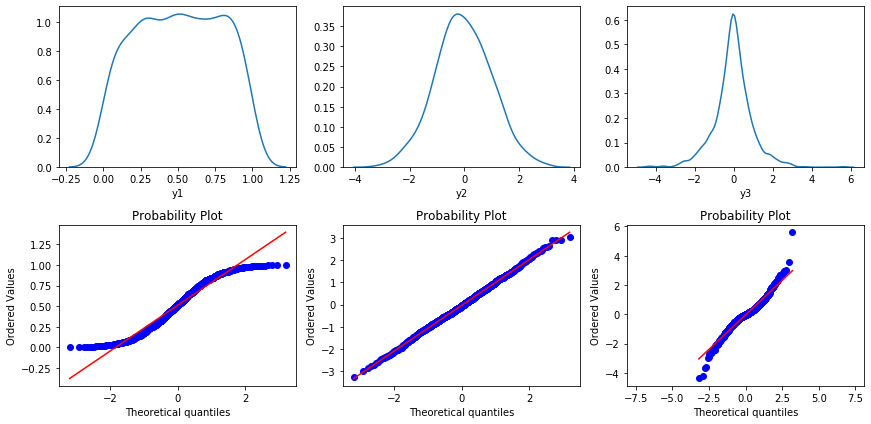

In [27]:
f, axes = plt.subplots(2, 3, figsize=(12, 6))

sns.distplot(aaa, hist=False, ax=axes[0][0])
probplot(aaa, plot=axes[1][0]) #scipy.stats.probplot

sns.distplot(bbb, hist=False, ax=axes[0][1])
probplot(bbb, plot=axes[1][1]) #scipy.stats.probplot

sns.distplot(ccc, hist=False, ax=axes[0][2])
probplot(ccc, plot=axes[1][2]) #scipy.stats.probplot

plt.tight_layout()

plt.axis("equal")

In [28]:
var_data3a = data3a['y1'].var()
var_data3b = data3b['y2'].var()
var_data3c = data3c['y3'].var()

print("variance of data3a: ",var_data3a)
print("variance of data3b: ",var_data3b)
print("variance of data3c: ",var_data3c)

variance of data3a:  0.07993845393236815
variance of data3b:  1.0514715877923277
variance of data3c:  0.9199347275545503


In [30]:
# In case of data3a, as we can see the plot, left tail is above the normal dist(straight line) and right tail is the below normal dist
# In this, it means that the distributed values of the data3a has small range. 
# So, we can say that data3a is more centered than normal dist. In that, the variance is smaller than normal, 0.07 < 1 
# And, the sample dist is higher than noraml in left tail, But, It become smaller than normal in right tail. 
# that is, sample dist is more increased in left side first but, in right side, noraml is more increased first.  

# In case of data3b, as we can see the plot, it is almost close to the straight line. 
# It means that the distribution is very similar with the normal dist. in that, the variance is almost similar with normal, 1.05 ≒ 1 

# In case of data3c, as we can see the plot, it has longer tail in both side tha normal.
# So, it has more broad range of distributed values of the data than the normal. 
# And, it is lower than normal in left side But, it is higher than normal in right side.
# So, In left side, normal is increased first but, in right side, sample dist is increased first
# Most part is close to the straight side but, in both tail side is outrange the normal. 
# So, the variance is 0.91 is slightly smaller than normal, 1  